In [66]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [32]:
users = pd.read_csv('data/movielens/users.dat', sep='::', names=['user_id', 'gender', 'age_group', 'occ', 'zip'])
users

/tmp/ipykernel_9593/368227457.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('data/movielens/users.dat', sep='::', names=['user_id', 'gender', 'age_group', 'occ', 'zip'])


,user_id,gender,age_group,occ,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [33]:
movies = pd.read_csv('data/movielens/movies.dat', sep='::', names=['movie_id', 'title', 'genres'])
movies

/tmp/ipykernel_9593/3819579374.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv('data/movielens/movies.dat', sep='::', names=['movie_id', 'title', 'genres'])


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [34]:
ratings = pd.read_csv('data/movielens/ratings.dat', sep='::', names=['user_id', 'movie_id', 'ratings', 'timestamp'])
ratings

/tmp/ipykernel_9593/3982999841.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('data/movielens/ratings.dat', sep='::', names=['user_id', 'movie_id', 'ratings', 'timestamp'])


,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [35]:
d1 = pd.merge(pd.merge(ratings, users), movies)
d1

,user_id,movie_id,ratings,timestamp,gender,age_group,occ,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [36]:
# popular films (more than 500 people who have rated it)
s1 = d1['title'].value_counts()
s2 = s1[s1 > 500]
popular_films = s2.index
popular_films

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Ordinary People (1980)', 'Ice Storm, The (1997)',
       'Peggy Sue Got Married (1986)', 'Halloween (1978)', '28 Days (2000)',
       'Body Heat (1981)', 'Alien Nation (1988)',
       'Guns of Navarone, The (1961)', 'Postino, Il (The Postman) (1994)',
       'Emma (1996)'],
      dtype='object', name='title', length=617)

In [37]:
# average ratings given by females for the different movies
d2 = d1[['gender', 'title', 'ratings']]
d2

,gender,title,ratings
0,F,One Flew Over the Cuckoo's Nest (1975),5
1,M,One Flew Over the Cuckoo's Nest (1975),5
2,M,One Flew Over the Cuckoo's Nest (1975),4
3,M,One Flew Over the Cuckoo's Nest (1975),4
4,M,One Flew Over the Cuckoo's Nest (1975),5
...,...,...,...
1000204,M,Modulations (1998),5
1000205,M,Broken Vessels (1998),3
1000206,M,White Boys (1999),1
1000207,F,One Little Indian (1973),5


In [38]:
d3 = d2[d2['gender'] == 'F']
del d3['gender']
d3

,title,ratings
0,One Flew Over the Cuckoo's Nest (1975),5
5,One Flew Over the Cuckoo's Nest (1975),4
7,One Flew Over the Cuckoo's Nest (1975),5
8,One Flew Over the Cuckoo's Nest (1975),3
19,One Flew Over the Cuckoo's Nest (1975),4
...,...,...
1000199,Song of Freedom (1936),5
1000200,Slappy and the Stinkers (1998),3
1000201,Nemesis 2: Nebula (1995),3
1000202,Smoking/No Smoking (1993),4


In [39]:
d4 = d3.groupby('title')
d5 = d4.mean()
d5

,ratings
title,
"$1,000,000 Duck (1971)",3.375000
'Night Mother (1986),3.388889
'Til There Was You (1997),2.675676
"'burbs, The (1989)",2.793478
...And Justice for All (1979),3.828571
...,...
Your Friends and Neighbors (1998),2.888889
"Zed & Two Noughts, A (1985)",3.500000
Zero Effect (1998),3.864407


In [40]:
d6 = d5.loc[popular_films]
d6

,ratings
title,
American Beauty (1999),4.238901
Star Wars: Episode IV - A New Hope (1977),4.302937
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481
Star Wars: Episode VI - Return of the Jedi (1983),3.865237
Jurassic Park (1993),3.579407
...,...
Body Heat (1981),3.943925
Alien Nation (1988),3.433333
"Guns of Navarone, The (1961)",4.061224


In [41]:
# top 10 popular films loved by females
d7 = d6.sort_values(by='ratings', ascending=False)
d7.head(10)

,ratings
title,
"Close Shave, A (1995)",4.644444
"Wrong Trousers, The (1993)",4.588235
Schindler's List (1993),4.562602
"Shawshank Redemption, The (1994)",4.539075
To Kill a Mockingbird (1962),4.536667
"Usual Suspects, The (1995)",4.513317
Rear Window (1954),4.484536
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132
"Sixth Sense, The (1999)",4.477410


In [42]:
d2

,gender,title,ratings
0,F,One Flew Over the Cuckoo's Nest (1975),5
1,M,One Flew Over the Cuckoo's Nest (1975),5
2,M,One Flew Over the Cuckoo's Nest (1975),4
3,M,One Flew Over the Cuckoo's Nest (1975),4
4,M,One Flew Over the Cuckoo's Nest (1975),5
...,...,...,...
1000204,M,Modulations (1998),5
1000205,M,Broken Vessels (1998),3
1000206,M,White Boys (1999),1
1000207,F,One Little Indian (1973),5


In [45]:
d8 = d2.pivot_table('ratings', aggfunc='mean', index='title', columns=['gender'])
d8

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [46]:
d9 = d8.loc[popular_films]
d9

gender,F,M
title,,
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
Body Heat (1981),3.943925,4.055416
Alien Nation (1988),3.433333,3.195946
"Guns of Navarone, The (1961)",4.061224,3.953642


In [47]:
# top 10 films loved by females
d10 = d9.sort_values(by='F', ascending=False)
d10.head(10)

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
To Kill a Mockingbird (1962),4.536667,4.372611
"Usual Suspects, The (1995)",4.513317,4.518248
Rear Window (1954),4.484536,4.472991
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Sixth Sense, The (1999)",4.477410,4.379944


In [48]:
# top 10 films loved by males
d11 = d9.sort_values(by='M', ascending=False)
d11.head(10)

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [51]:
# top 10 films with the max disagreement factor
d12 = d9.copy()
d12['diff'] = d12['F'] - d12['M']
d12['diff'] = d12['diff'].abs()
d12

gender,F,M,diff
title,,,
American Beauty (1999),4.238901,4.347301,0.108400
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,0.192371
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577,0.238096
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058,0.203821
Jurassic Park (1993),3.579407,3.814197,0.234791
...,...,...,...
Body Heat (1981),3.943925,4.055416,0.111490
Alien Nation (1988),3.433333,3.195946,0.237387
"Guns of Navarone, The (1961)",4.061224,3.953642,0.107582


In [63]:
d13 = d12.sort_values(by='diff', ascending=False)
d14 = d13.head(10)
del d14['F']
del d14['M']
d14

gender,diff
title,
Dirty Dancing (1987),0.830782
"Good, The Bad and The Ugly, The (1966)",0.726351
Dumb & Dumber (1994),0.638608
Evil Dead II (Dead By Dawn) (1987),0.611985
Grease (1978),0.608224
Caddyshack (1980),0.573602
Animal House (1978),0.538286
"Exorcist, The (1973)",0.529605
"Rocky Horror Picture Show, The (1975)",0.512885


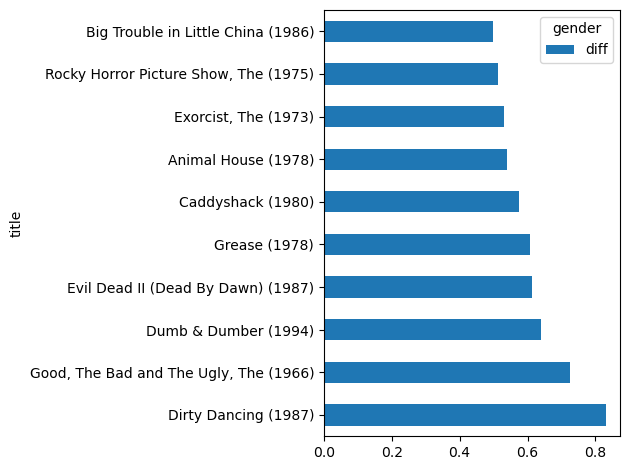

In [68]:
d14.plot(kind='barh')
plt.tight_layout()
plt.savefig('disagreement.pdf', format='pdf')